## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_of_mice = len(mouse_study_df['Mouse ID'].unique())
num_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_group = mouse_study_df.groupby('Mouse ID')
check_duplicate = mice_group['Timepoint'].value_counts()
duplicated_mice = check_duplicate[check_duplicate > 1]
duplicated_mice_id = duplicated_mice.index.get_level_values('Mouse ID').unique().tolist()
duplicated_mice_id

['g989']

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
filt = mouse_study_df['Mouse ID'] != duplicated_mice_id[0]
filt

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df.loc[filt]
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_cleaned = len(cleaned_df['Mouse ID'].unique())
num_of_mice_cleaned

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group = cleaned_df.groupby('Drug Regimen')

tumor_mean = regimen_group['Tumor Volume (mm3)'].mean()
tumor_median = regimen_group['Tumor Volume (mm3)'].median()
tumor_var = regimen_group['Tumor Volume (mm3)'].var()
tumor_std = regimen_group['Tumor Volume (mm3)'].std()
tumor_sem = regimen_group['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({'Mean of Tumor Volume': tumor_mean,
                                 'Median of Tumor Volume': tumor_median,
                                 'Variance of Tumor Volume': tumor_var,
                                 'Standard Deviation of Tumor Volume': tumor_std,
                                 'SEM of Tumor Volume': tumor_sem
})

summary_stats_df

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

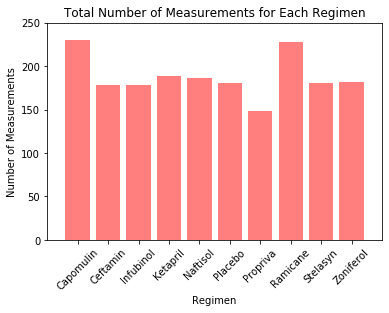

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measures = regimen_group.count().iloc[:, 0]
total_measures.plot(kind="bar", color='r', alpha=0.5, align="center", width=0.8)
plt.xticks(rotation=45)

# Other aesthetics
plt.title("Total Number of Measurements for Each Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-1, len(total_measures))
plt.ylim(0, max(total_measures) + 20)
plt.show()

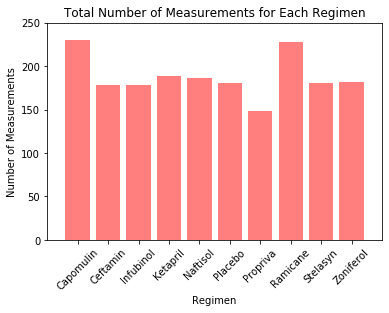

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measures = regimen_group.count().iloc[:, 0]
x_axis = np.arange(len(total_measures))
regimen = total_measures.index.get_level_values('Drug Regimen').tolist()
plt.bar(x_axis, total_measures, color='r', alpha=0.5, align="center", width=0.8)
plt.xticks(x_axis, regimen, rotation=45)

# Other aesthetics
plt.title("Total Number of Measurements for Each Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-1, len(total_measures))
plt.ylim(0, max(total_measures) + 20)
plt.show()

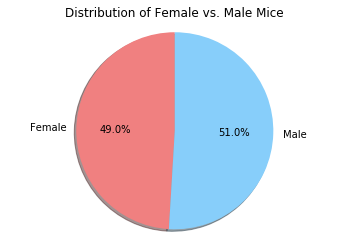

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = cleaned_df.groupby('Sex')

sex_distribution = sex_group.count().iloc[:, 0]
sex_distribution.plot(kind="pie", labels=labels, colors=colors, 
                      autopct="%1.1f%%",shadow=True, startangle=90)

# Other aesthetics
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("")

plt.axis("equal")
plt.show()

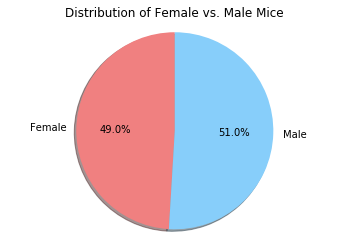

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = sex_group.count().iloc[:, 0]
labels = sex_distribution.index.get_level_values('Sex').tolist()
colors = ["lightcoral", "lightskyblue"]
plt.pie(sex_distribution, labels=labels, colors=colors, 
        autopct="%1.1f%%",shadow=True, startangle=90)

# Other aesthetics
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("")

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Only look at the four treatment regimens
filt1 = cleaned_df['Drug Regimen'] == 'Capomulin'
filt2 = cleaned_df['Drug Regimen'] == 'Ramicane'
filt3 = cleaned_df['Drug Regimen'] == 'Infubinol'
filt4 = cleaned_df['Drug Regimen'] == 'Ceftamin'
four_regimens_df = cleaned_df.loc[filt1 | filt2 | filt3 | filt4]

regimen_mice_group = four_regimens_df.groupby(['Drug Regimen', 'Mouse ID'])
last_timepoints = regimen_mice_group['Timepoint'].max()

# Create a new df using the grouped df and create a unique 'identifier' key
last_timepoints_df = pd.DataFrame(last_timepoints)
last_timepoints_df.reset_index(inplace=True)
last_timepoints_df['Timepoint'] = last_timepoints_df['Timepoint'].astype(str)
last_timepoints_df['final_tumor_key'] = last_timepoints_df['Drug Regimen'] + last_timepoints_df['Mouse ID'] + last_timepoints_df['Timepoint']

# Create a unique key in the original df too so later can merge the two
four_regimens_df['Timepoint'] = four_regimens_df['Timepoint'].astype(str)
four_regimens_df['final_tumor_key'] = four_regimens_df['Drug Regimen'] + four_regimens_df['Mouse ID'] + four_regimens_df['Timepoint']
four_regimens_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(four_regimens_df, last_timepoints_df['final_tumor_key'],
                          on="final_tumor_key")
final_tumor_df = final_tumor_df.sort_values('Drug Regimen')
final_tumor_df = final_tumor_df.reset_index()
final_tumor_df[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]

/Users/ZTC/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ZTC/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,j246,38.753265
1,Capomulin,v923,40.658124
2,Capomulin,w150,39.952347
3,Capomulin,j119,38.125164
4,Capomulin,l509,41.483008
...,...,...,...
95,Ramicane,r921,43.419381
96,Ramicane,w678,43.166373
97,Ramicane,y449,44.183451
98,Ramicane,r811,37.225650


In [135]:
final_tumor_df['Tumor Volume (mm3)'].values

array([38.75326548, 40.65812366, 39.95234669, 38.1251644 , 41.48300765,
       41.58152074, 38.98287774, 38.93963263, 46.53920617, 38.84687569,
       47.68596303, 37.07402422, 36.04104736, 37.31184577, 40.1592203 ,
       34.45529799, 40.72857787, 23.34359787, 33.32909778, 32.37735684,
       28.48403281, 31.8962384 , 28.43096411, 31.02392294, 30.48598484,
       46.78453491, 48.72207785, 68.92318457, 67.74866174, 61.43389223,
       55.74282869, 45.        , 59.74190064, 56.05774909, 64.72983655,
       64.29983003, 59.85195552, 57.91838132, 62.99935619, 61.84902336,
       47.7846818 , 68.59474498, 45.        , 52.92534846, 61.38666032,
       64.63494887, 45.        , 45.        , 64.19234114, 67.52748237,
       67.68556862, 66.19691151, 62.11727887, 58.26844248, 51.54243058,
       54.04860769, 46.25011212, 47.01036401, 60.16518046, 55.62942846,
       45.69933088, 55.65068132, 54.65654872, 50.00513807, 67.97341878,
       62.75445141, 60.91876652, 62.43540402, 60.96971133, 36.32

In [173]:
# Below is the original given instructions in this starter file:
    # Put treatments into a list for for loop (and later for plot labels)
    # Create empty list to fill with tumor vol data (for plotting)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
        # Locate the rows which contain mice on each drug and get the tumor volumes
        # add subset
        # Determine outliers using upper and lower bounds

# --------------------------------------------------------------------------

# With my previous code I do not think the given instructions make the most sense,
# so for this section I will follow my own instinct:

# Calculate IQR
tumor_vol = final_tumor_df['Tumor Volume (mm3)'].values
quartiles = final_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine a boundary for identifying potential outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of tumor volume is: {round(lowerq, 3)}")
print(f"The upper quartile of tumor volume is: {round(upperq, 3)}")
print(f"The interquartile range of tumor volume is: {round(iqr, 3)}")
print(f"The the median of tumor volume is: {round(quartiles[0.5], 3)} ")
print(f'Values below {round(lower_bound, 3)} could be outliers.')
print(f'Values above {round(upper_bound, 3)} could be outliers.')
print(f'The biggest tumor volume in this dataset is {round(max(tumor_vol), 3)}.')
print(f'The smallest tumor volume in this dataset is {round(min(tumor_vol), 3)}.')

# Finally, use an if statement to automate an answer for whether we idenfify there's any outlier
outlier_filt = (final_tumor_df['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_df['Tumor Volume (mm3)'] > upper_bound)
outliers = final_tumor_df.loc[outlier_filt]

if len(outliers) > 0:
    print(f'Outlier(s) exist(s), they are:')
    outliers
else:
    print(f'There is no outlier.')

The lower quartile of tumor volume is: 37.188
The upper quartile of tumor volume is: 59.93
The interquartile range of tumor volume is: 22.743
The the median of tumor volume is: 45.0 
Values below 3.074 could be outliers.
Values above 94.044 could be outliers.
The biggest tumor volume in this dataset is 72.227.
The smallest tumor volume in this dataset is 22.05.
There is no outlier.


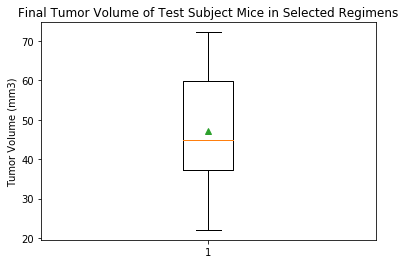

In [174]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Test Subject Mice in Selected Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, showmeans=True)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
